In [6]:
import json
import requests
import pandas as pd

In [7]:
import os

dir_path = 'C:/Users/SIDDHANT/OneDrive/Desktop/Fall 22/ECE 143/Project/NBA_shot_analysis/yearwise data/'
df_by_year = {}
cwd = os.path.abspath(dir_path)
file_list = os.listdir(cwd)

In [ ]:
for file in file_list:
    df_temp = pd.read_csv(dir_path+file)
    filename = file.split('.')[0]
    file_player_id, file_year = int(filename.split('-')[0]), int(filename.split('-')[1])
    if not file_year in df_by_year:
        df_by_year[file_year] = pd.DataFrame()
    df_by_year[file_year] = df_by_year[file_year].append(df_temp, ignore_index=True)

In [8]:
for file in file_list:
    df_temp = pd.read_csv(dir_path+file)
    year = file.split('.')[0][-4:]
    df_by_year[int(year)] = df_temp

In [9]:
len(df_by_year)

26

In [21]:
for k,v in df_by_year.items():
    v.to_csv('season'+str(k)+'.csv', index=False)

In [10]:
print(df_by_year[2004].SHOT_ZONE_AREA.unique())

['Center(C)' 'Right Side(R)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Left Side(L)' 'Back Court(BC)']


In [53]:
two_pt_accuracy_by_year = {}
three_pt_accuracy_by_year = {}
ratio_three_two_attempts_by_year = {}
avg_attempts_per_match = {}
r_attempts_per_match_by_year = {}
c_attempts_per_match_by_year = {}
l_attempts_per_match_by_year = {}
lc_attempts_per_match_by_year = {}
rc_attempts_per_match_by_year = {}
bc_attempts_per_match_by_year = {}
r_accuracy_per_match_by_year = {}
c_accuracy_per_match_by_year = {}
l_accuracy_per_match_by_year = {}
lc_accuracy_per_match_by_year = {}
rc_accuracy_per_match_by_year = {}
bc_accuracy_per_match_by_year = {}

In [54]:
def calcPoints(x, y):
    if y < 115:
        return 2 if abs(x) < 220 else 3
    else:
        return 2 if x**2 + y**2 < 237.5**2 else 3
        

In [55]:
def accuracy(df):
    return sum(df['SHOT_MADE_FLAG'])/sum(df['SHOT_ATTEMPTED_FLAG'])

In [58]:
for k,v in df_by_year.items():
    points = [calcPoints(rows['LOC_X'], rows['LOC_Y']) for index, rows in v.iterrows()]
    v['attempted_points'] = points
    two_pt_accuracy = accuracy(v[v['attempted_points'] == 2])
    three_pt_accuracy = accuracy(v[v['attempted_points'] == 3])
    two_pt_accuracy_by_year[k] = two_pt_accuracy
    three_pt_accuracy_by_year[k] = three_pt_accuracy
    ratio_three_two_attempts_by_year[k] = len(v[v['attempted_points'] == 3])/len(v[v['attempted_points'] == 2])
    avg_attempts_per_match[k] = len(v)/len(v.GAME_ID.unique())
    r_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Right Side(R)'])/len(v)
    rc_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Right Side Center(RC)'])/len(v)
    c_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Center(C)'])/len(v)
    lc_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Left Side Center(LC)'])/len(v)
    l_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Left Side(L)'])/len(v)
    bc_attempts_per_match_by_year[k] = len(v[v['SHOT_ZONE_AREA'] == 'Back Court(BC)'])/len(v)

In [56]:
for k,v in df_by_year.items():
    points = [calcPoints(rows['LOC_X'], rows['LOC_Y']) for index, rows in v.iterrows()]
    v['attempted_points'] = points
    r_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Right Side(R)'])
    rc_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Right Side Center(RC)'])
    c_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Center(C)'])
    lc_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Left Side Center(LC)'])
    l_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Left Side(L)'])
    bc_accuracy_per_match_by_year[k] = accuracy(v[v['SHOT_ZONE_AREA'] == 'Back Court(BC)'])

In [59]:
import matplotlib.pylab as plt

two_pt_accuracy_by_year_list = sorted(two_pt_accuracy_by_year.items())
three_pt_accuracy_by_year_list = sorted(three_pt_accuracy_by_year.items())
ratio_three_two_attempts_by_year_list = sorted(ratio_three_two_attempts_by_year.items())
avg_attempts_per_match_list = sorted(avg_attempts_per_match.items())
r_attempts_per_match_by_year_list = sorted(r_attempts_per_match_by_year.items())
l_attempts_per_match_by_year_list = sorted(l_attempts_per_match_by_year.items())
rc_attempts_per_match_by_year_list = sorted(rc_attempts_per_match_by_year.items())
lc_attempts_per_match_by_year_list = sorted(lc_attempts_per_match_by_year.items())
c_attempts_per_match_by_year_list = sorted(c_attempts_per_match_by_year.items())
bc_attempts_per_match_by_year_list = sorted(bc_attempts_per_match_by_year.items())

r_accuracy_per_match_by_year_list = sorted(r_accuracy_per_match_by_year.items())
l_accuracy_per_match_by_year_list = sorted(l_accuracy_per_match_by_year.items())
rc_accuracy_per_match_by_year_list = sorted(rc_accuracy_per_match_by_year.items())
lc_accuracy_per_match_by_year_list = sorted(lc_accuracy_per_match_by_year.items())
c_accuracy_per_match_by_year_list = sorted(c_accuracy_per_match_by_year.items())
bc_accuracy_per_match_by_year_list = sorted(bc_accuracy_per_match_by_year.items())

x_two_pt, y_two_pt = zip(*two_pt_accuracy_by_year_list)
x_three_pt, y_three_pt = zip(*three_pt_accuracy_by_year_list)
x_ratio, y_ratio = zip(*ratio_three_two_attempts_by_year_list)
x_avg_attempts, y_avg_attempts = zip(*avg_attempts_per_match_list)
x_r_attempts, y_r_attempts = zip(*r_attempts_per_match_by_year_list)
x_l_attempts, y_l_attempts = zip(*l_attempts_per_match_by_year_list)
x_rc_attempts, y_rc_attempts = zip(*rc_attempts_per_match_by_year_list)
x_lc_attempts, y_lc_attempts = zip(*lc_attempts_per_match_by_year_list)
x_c_attempts, y_c_attempts = zip(*c_attempts_per_match_by_year_list)
x_bc_attempts, y_bc_attempts = zip(*bc_attempts_per_match_by_year_list)

x_r_accuracy, y_r_accuracy = zip(*r_accuracy_per_match_by_year_list)
x_l_accuracy, y_l_accuracy = zip(*l_accuracy_per_match_by_year_list)
x_rc_accuracy, y_rc_accuracy = zip(*rc_accuracy_per_match_by_year_list)
x_lc_accuracy, y_lc_accuracy = zip(*lc_accuracy_per_match_by_year_list)
x_c_accuracy, y_c_accuracy = zip(*c_accuracy_per_match_by_year_list)
x_bc_accuracy, y_bc_accuracy = zip(*bc_accuracy_per_match_by_year_list)

In [62]:
def plot_data(x, y, title, xl, yl):
    plt.style.use('dark_background')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    plt.plot(x, y, color='#E31C79')
    plt.show()

In [63]:
def twin_plots(x, y1, y2, title, xl, yl1, yl2):
    plt.style.use('dark_background')
    fig, ax = plt.subplots()
    ax.plot(x, y1, color='#E31C79')
    ax.set_xlabel(xl)
    ax.set_ylabel(yl1)
    ax2 = ax.twinx()
    ax2.plot(x, y2, color='#87CEEB')
    ax2.set_ylabel(yl2)
    plt.title(title)
    plt.show()

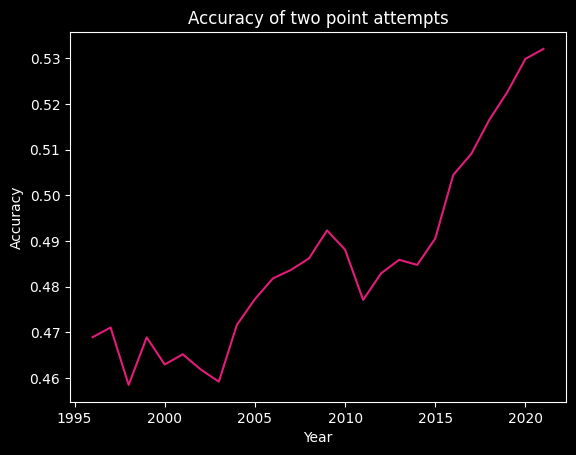

In [64]:
plot_data(x_two_pt, y_two_pt, 'Accuracy of two point attempts', 'Year', 'Accuracy')


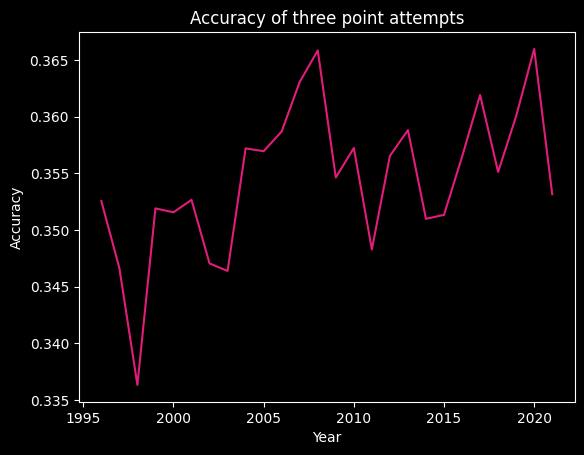

In [65]:
plot_data(x_three_pt, y_three_pt, 'Accuracy of three point attempts', 'Year', 'Accuracy')


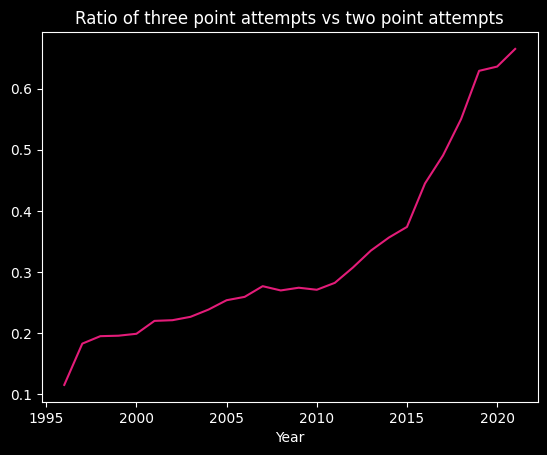

In [66]:
plot_data(x_ratio, y_ratio, 'Ratio of three point attempts vs two point attempts', 'Year', '')

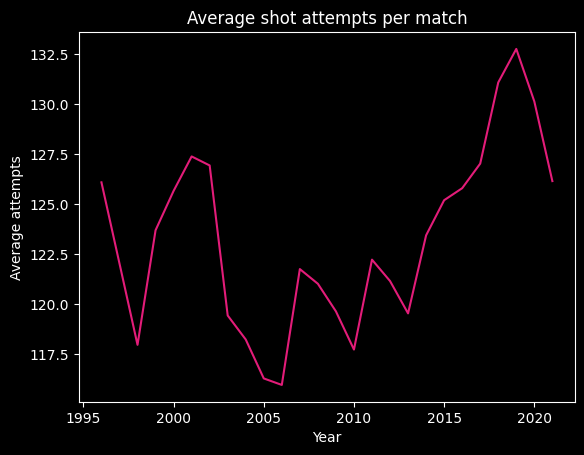

In [67]:
plot_data(x_avg_attempts, y_avg_attempts, 'Average shot attempts per match', 'Year', 'Average attempts')

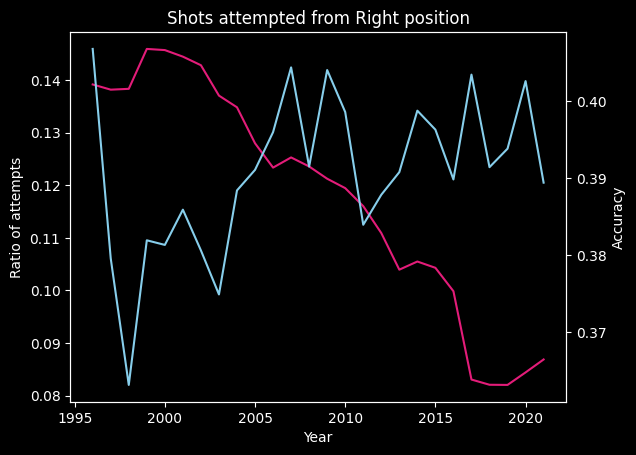

In [69]:
twin_plots(x_r_attempts, y_r_attempts, y_r_accuracy, 'Shots attempted from Right position', 'Year', 'Ratio of attempts', 'Accuracy')

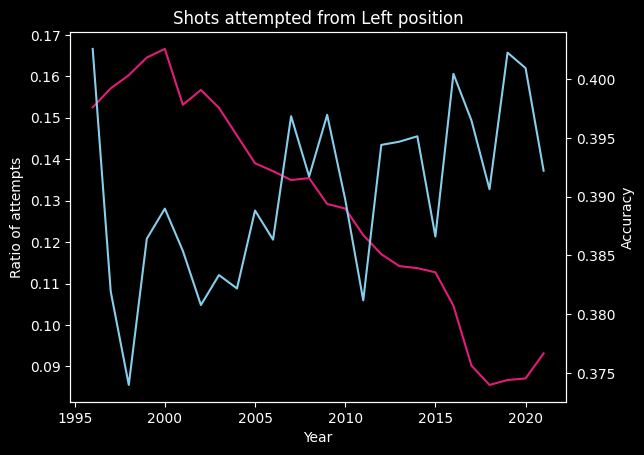

In [70]:
twin_plots(x_l_attempts, y_l_attempts, y_l_accuracy, 'Shots attempted from Left position', 'Year', 'Ratio of attempts', 'Accuracy')

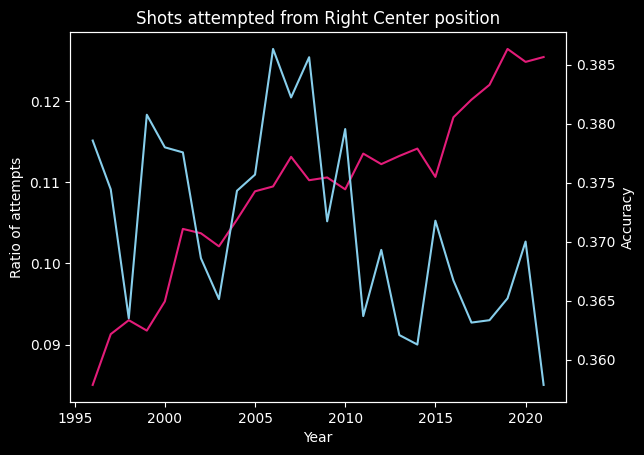

In [71]:
twin_plots(x_rc_attempts, y_rc_attempts, y_rc_accuracy, 'Shots attempted from Right Center position', 'Year', 'Ratio of attempts', 'Accuracy')

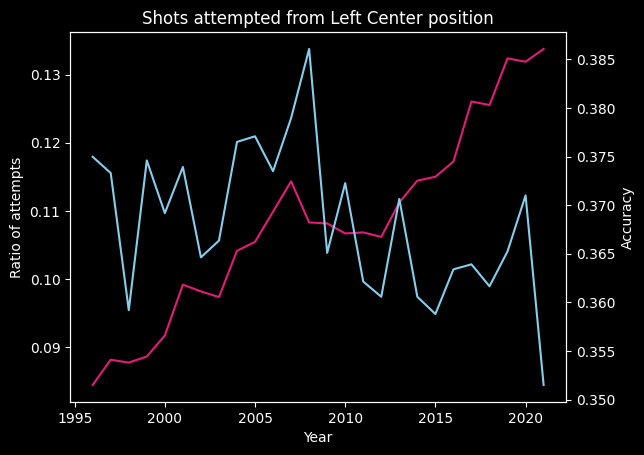

In [72]:
twin_plots(x_lc_attempts, y_lc_attempts, y_lc_accuracy, 'Shots attempted from Left Center position', 'Year', 'Ratio of attempts', 'Accuracy')

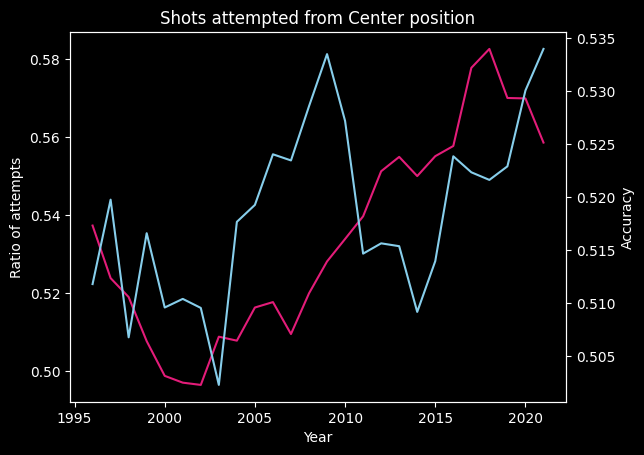

In [73]:
twin_plots(x_c_attempts, y_c_attempts, y_c_accuracy, 'Shots attempted from Center position', 'Year', 'Ratio of attempts', 'Accuracy')

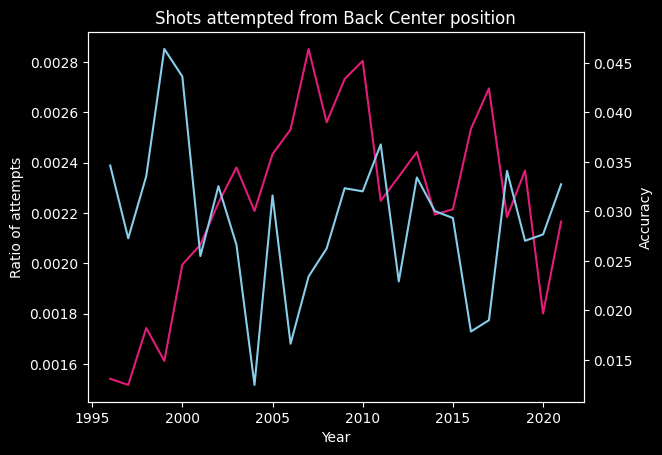

In [74]:
twin_plots(x_bc_attempts, y_bc_attempts, y_bc_accuracy, 'Shots attempted from Back Center position', 'Year', 'Ratio of attempts', 'Accuracy')